<a href="https://colab.research.google.com/github/c-j-lh/classical/blob/master/starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygame

     |████████████████████████████████| 11.4MB 2.6MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install pypianoroll
import pickle
with open('/content/drive/My Drive/Colab Notebooks/ClassicalPianoRolls/music.pk', 'rb') as file:
    music = pickle.load(file)
music[0]

     |████████████████████████████████| 5.6MB 5.6MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
  Created wheel for pypianoroll: filename=pypianoroll-0.5.3-cp36-none-any.whl size=23827 sha256=7acd2f041a05bd228e221570da1f8f9cff92d337afa8f937a8c2f060ad666e2b
  Stored in directory: /root/.cache/pip/wheels/29/c8/c0/7b240ab723c2f96b03391796bdf278de513eabf1dfb989c07f
  Created wheel for pretty-midi: filename=pretty_midi-0.2.8-cp36-none-any.whl size=5590819 sha256=086a475dcbeaa6b39546975c3f73927773c48899aeb95ef89f710a28f9a9b7cf
  Stored in directory: /root/.cache/pip/wheels/22/e7/6b/70eb5879f7dbcb4f44fee735a61d6298f9e082be8538b52422
Successfully built pypianoroll pretty-midi


{'composer': 'Albeniz',
 'name': 'albeniz_suite_espanola_47_02_cataluna_(c)yogore.mid',
 'piece': <7368x128 sparse matrix of type '<class 'numpy.float64'>'
 	with 28387 stored elements in COOrdinate format>}

5992
{'Alkan': 249, 'Bach, J.S': 1965, 'Beethoven': 290, 'Brahms': 150, 'Byrd': 113, 'Chopin': 252, 'Dandrieu': 163, 'Debussy': 149, 'Dvořák': 147, 'Handel': 496, 'Haydn, F': 237, 'Mozart': 568, 'Scarlatti, D': 555, 'Schubert': 281, 'Schumann': 102, 'Tchaikovsky': 275}


<BarContainer object of 16 artists>

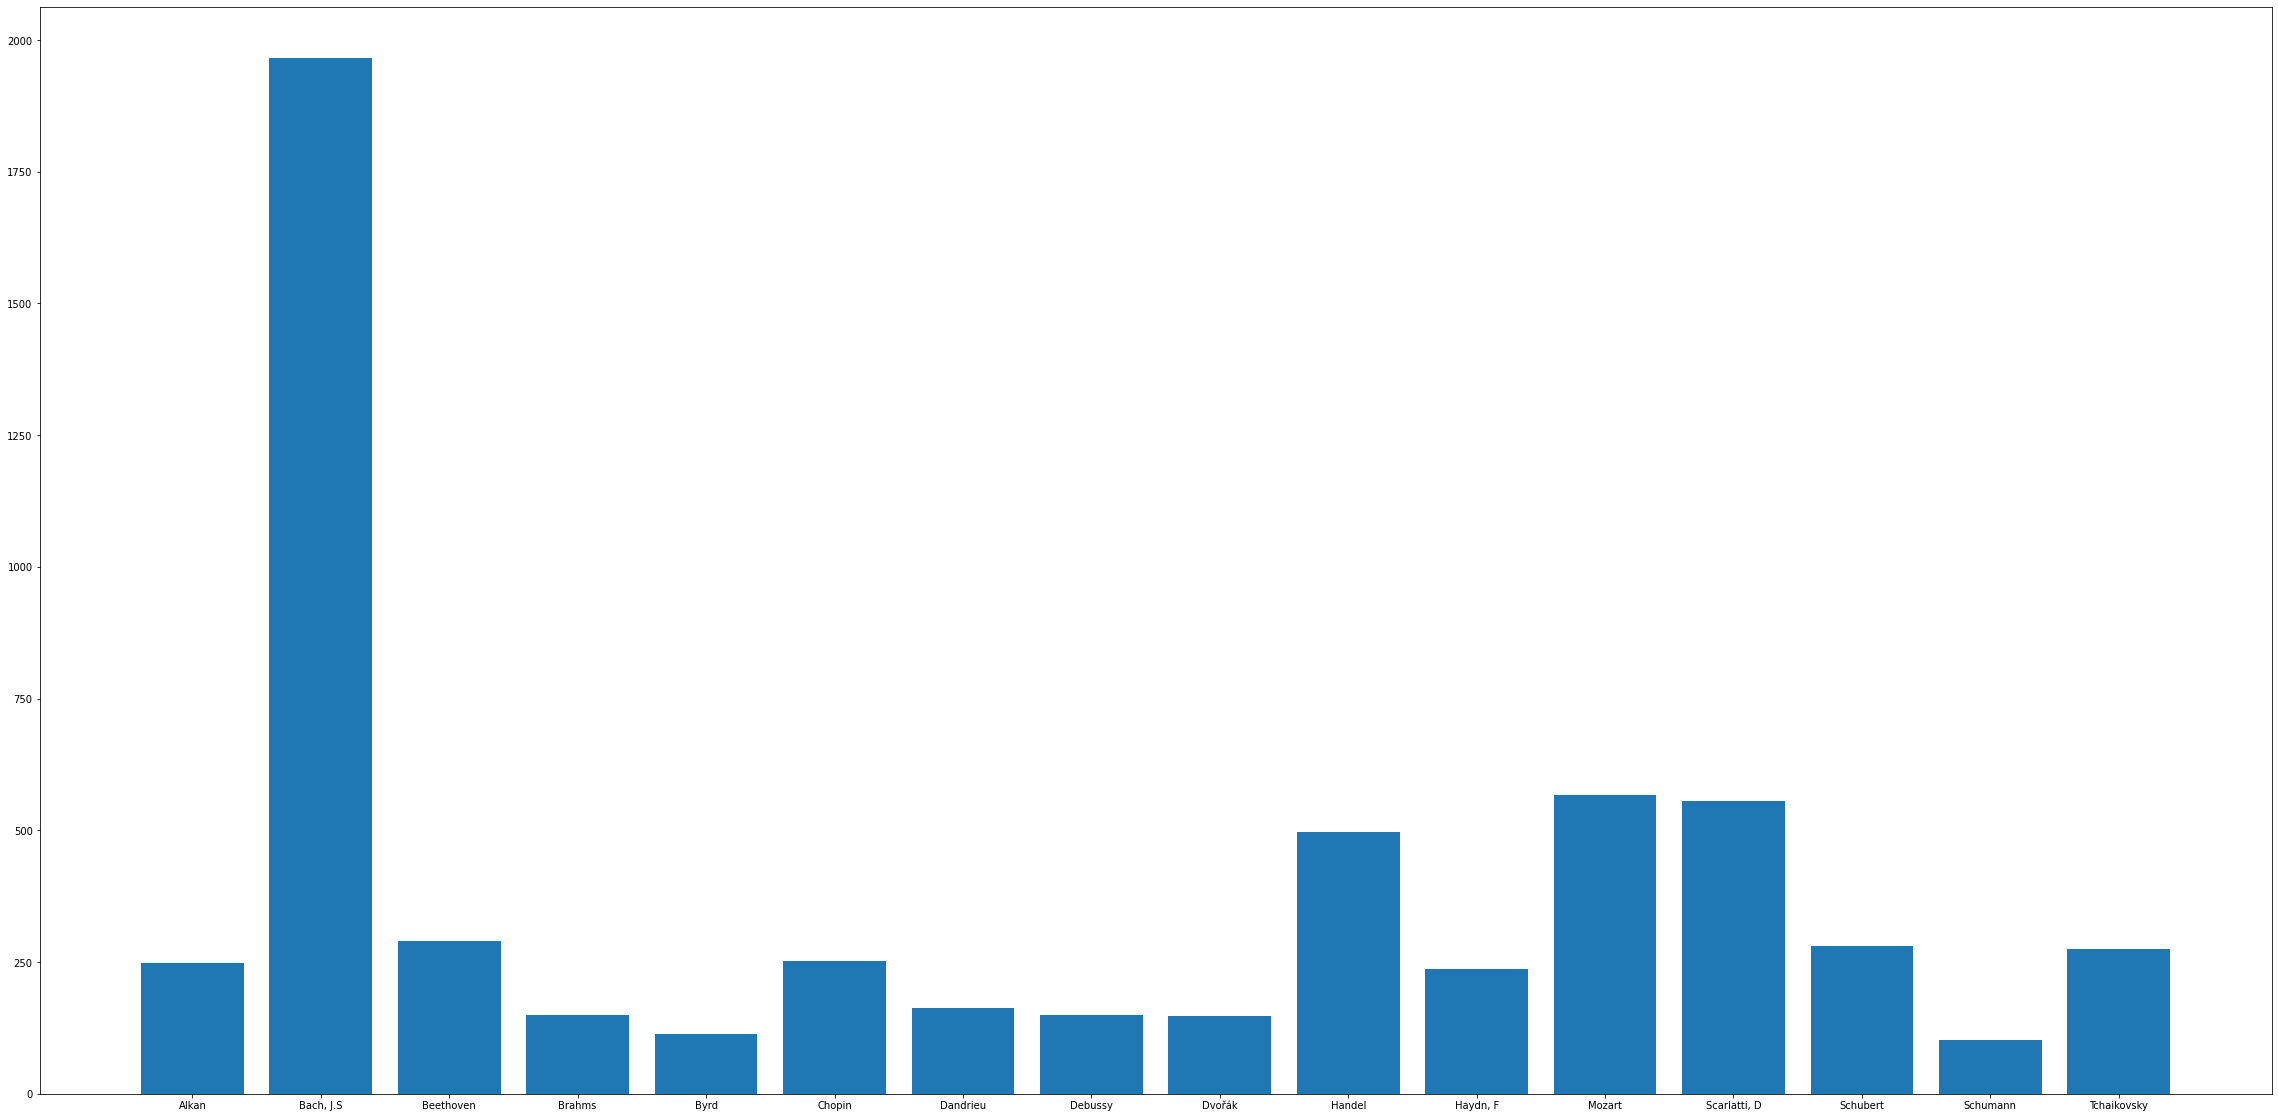

In [10]:
import random
from collections import Counter
import matplotlib.pyplot as plt
c = Counter([i["composer"] for i in music]).items()
fig, ax = plt.subplots(figsize=(40, 20))
c = dict(c)

music = [piece for piece in music if c[piece["composer"]]>=100]
print(len(music))

print(c)
c = dict((i,j) for i,j in c.items() if j>=100)
ax.bar(c.keys(), c.values())

In [0]:
sampler = random.sample(music, 200)

'''import itertools
from scipy.sparse import vstack
import tqdm
num_composers = 40
chunk_size = 1024
groups = itertools.groupby(sorted(music, key=lambda x: x["composer"]), lambda x: x["composer"])
segments = []
for composer, pieces in tqdm.tqdm_notebook(groups, total=num_composers):
    pieces_list = list(i["piece"].tocsr() for i in pieces)
    n = sum([i.shape[0] for i in pieces_list])//chunk_size
    if n!=0:
        trimmed_concat  = vstack(pieces_list)[:chunk_size*n]
        composer_segs = [(trimmed_concat[i:i+chunk_size], composer) for i in range(0,n*chunk_size,chunk_size)]
        segments.extend(composer_segs)
random.shuffle(segments)'''

c = Counter(seg[1] for seg in segments).items()
fig, ax = plt.subplots(figsize=(40, 20))
ax.bar(*zip(*c))

from pypianoroll import Multitrack, Track
import pygame
print('hi')
def write_midi(arr, filename):
    Multitrack(tracks=[Track(arr*127)]).write(filename)
def play(filename):
    pygame.init()
    pygame.mixer.music.load(filename)
    pygame.mixer.music.play()
def test(num):
    answers = []
    for seg, comp in segments[:num]:
        write_midi(seg.toarray(), "temp2.mid")
        play("temp.mid")
        inp = input("Who was it?")
        if inp=="quit":
            break
        if len(inp)>=3 and inp.lower() in comp.lower():
            print(f"Correct the composer was {comp}")
            answers.append((comp, True))
        else:
            print(f"Incorrect the composer was {comp}")
            answers.append((comp, False))
    return answers
print('hi')
test(8)

In [0]:
from pypianoroll.metrics import *
import numpy as np
import pandas as pd

def dict_(): return dict((composer, []) for composer in c)
arr, e, npu, npc, q, p, dip, isr =  dict_(), dict_(), dict_(), dict_(), dict_(), dict_(), dict_(), dict_()

ear = []
npuar = []
npuar = []
traits = pd.DataFrame

for piece in sampler:
    arr = np.array(piece["piece"].todense())
    composer = piece["composer"]
    e[composer] += [empty_beat_rate(arr, 4)] # need time sig
    npu[composer] += [n_pitches_used(arr)]
    npc[composer] += [n_pitch_classes_used(arr)]
    #q += [qualified_note_rate(arr)]
    p[composer] += [polyphonic_rate(arr)]
    #dip += [drum_in_pattern_rate(arr, 4)]
    isr[composer] += [in_scale_rate(arr)]
    #print(f'{polyphonic_rate(, beat_resolution=4):.3f}')

import matplotlib.pyplot as plt
'''plt.hist(e)
plt.figure(); plt.hist(npu)
plt.figure(); plt.hist(npc)
plt.figure(); plt.hist(p)
plt.figure(); plt.hist(isr)'''

for set_ in (e, npu, npc, p, isr):
    plt.figure(figsize=(20,5))
    plt.boxplot(set_.values(), labels=set_.keys())

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X = ()
y = ()

model = MLPClassifier()